In [0]:
import numpy as np
import pandas as pd
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

%matplotlib inline

In [0]:
#Data Loading for a), b)
doc_word_matrix = np.load("science2k-doc-word.npy")
word_doc_matrix = np.load("science2k-word-doc.npy")

titles = pd.read_table('science2k-titles.txt', names=["Titles"])
vocab = pd.read_table('science2k-vocab.txt', names=["Words"])

#Cluster the documents using k-means and various values of k (go up to at least k = 20).

In [0]:
doc_word_matrix_labels = list()
doc_word_matrix_inertia = list()

for i in range(1, 21):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(doc_word_matrix)
  doc_word_matrix_labels.append(kmeans.labels_)
  doc_word_matrix_inertia.append(kmeans.inertia_)

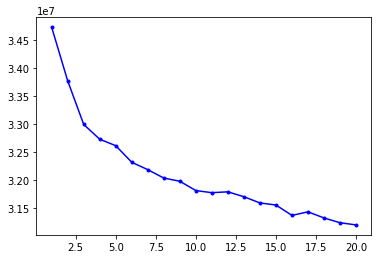

In [14]:
fig, ax = plt.subplots()
ax.plot(range(1,21), doc_word_matrix_inertia, marker = ".", color = 'blue')

#Select a value of k. For that value, report the top 10 words of each cluster in order of the largest positive distance from the average value across all data.

In [23]:
#Select a value of k.
k = 5
kmeans = KMeans(n_clusters = k).fit(doc_word_matrix)
labels = kmeans.labels_
sorted_cluster_centers = kmeans.cluster_centers_
x_bar = np.mean(doc_word_matrix, axis=0)

for i in range(0, k):
  sc_i = sorted_cluster_centers[i]
  sc_i_word_diff = np.abs(sc_i - x_bar)
  
  sc_i_dist_diff = list()
  for j in range(len(doc_word_matrix)):
    diff = np.subtract(doc_word_matrix[j], sc_i - x_bar)
    dist = np.linalg.norm(diff)
    sc_i_dist_diff.append(dist)

  words_i = np.argsort(sc_i_word_diff)[-10:][::-1]
  docs_i = np.argsort(np.array(sc_i_dist_diff))[0:10]
  print("Cluster {}’s top 10 articles: ".format(i+1))
  print(titles.iloc[docs_i])
  print("\n")
  print("Cluster {}’s top 10 words: ".format(i+1))
  print(vocab.iloc[words_i])
  print('-----------------------------------------------------')

Cluster 1’s top 10 articles: 
                                                 Titles
519        Algorithmic Gladiators Vie for Digital Glory
574     Reopening the Darkest Chapter in German Science
499     National Academy of Sciences Elects New Members
968   Suppression of Mutations in Mitochondrial DNA ...
777                  Divining Diet and Disease from DNA
1214      Turning up the Heat on Histoplasma capsulatum
90               Heretical Idea Faces Its Sternest Test
1239                        An Arresting Start for MAPK
431                Movement Patterns in Spoken Language
899   How to Get along: Friendly Microbes in a Hosti...


Cluster 1’s top 10 words: 
          Words
1         cells
7       protein
5          cell
23   expression
17         gene
0           fig
161   expressed
22     proteins
56     specific
67         wild
-----------------------------------------------------
Cluster 2’s top 10 articles: 
                                                Titles
519       

#b)
This matrix is 5476×1373, where each row is a term in Science described by 1373 “document” features. These are transformed document frequencies (as above). Repeat the analysis above, but cluster terms instead of documents. The terms are listed in science2k-vocab.txt
Comment on these results. How might such an algorithm be useful? What is different about clustering terms from clustering documents?

In [0]:
word_doc_matrix_labels = []
word_doc_matrix_inertia = []

for i in range(1, 21):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(word_doc_matrix)
  word_doc_matrix_labels.append(kmeans.labels_)
  word_doc_matrix_inertia.append(kmeans.inertia_)

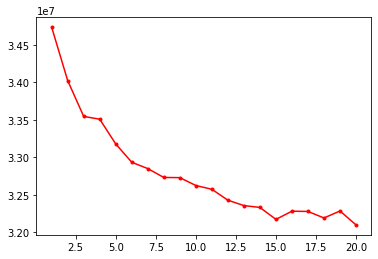

In [6]:
fig, ax = plt.subplots()
ax.plot(range(1,21), word_doc_matrix_inertia, marker = ".", color = 'red')

In [0]:
#Select a value of k.
k = 5
kmeans = KMeans(n_clusters = k).fit(doc_word_matrix)
labels = kmeans.labels_
sorted_cluster_centers = kmeans.cluster_centers_

x_bar_2 = np.mean(doc_word_matrix, axis=0)

for i in range(0, k):
  sc_i = sorted_cluster_centers[i]
  sc_i_word_diff = np.abs(sc_i - x_bar_2)
  
  sc_i_dist_diff = list()
  for j in range(len(doc_word_matrix)):
    diff = np.subtract(doc_word_matrix[j], sc_i - x_bar_2)
    dist = np.linalg.norm(diff)
    sc_i_dist_diff.append(dist)
  
  words_i = np.argsort(sc_i_word_diff)[0:10]
  docs_i = np.argsort(np.array(sc_i_dist_diff))[-10:][::-1]
  print("Cluster {}’s top 10 articles: ".format(i+1))
  print(titles.iloc[docs_i])
  print("\n")
  print("Cluster {}’s top 10 words: ".format(i+1))
  print(vocab.iloc[words_i])
  print('-----------------------------------------------------')

Cluster 1’s top 10 articles: 
                                                 Titles
1242                      Atom-Scale Research Gets Real
325      The Genome Sequence of Drosophila melanogaster
402                                  A Mouse Chronology
1303                    Sedimentary Rocks of Early Mars
631   Status and Improvements of Coupled General Cir...
837   The Complete Atomic Structure of the Large Rib...
988          NEAR at Eros: Imaging and Spectral Results
436   Advances in the Physics of High-Temperature Su...
1345    Breakthrough of the Year: Genomics Comes of Age
327              Comparative Genomics of the Eukaryotes


Cluster 1’s top 10 words: 
               Words
4035       virulence
4357        bethesda
2336      boundaries
1613        describe
3089            kept
1332             mid
1949          status
359             five
3704  ubiquitination
4144        mediates
-----------------------------------------------------
Cluster 2’s top 10 articles: 
          